In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Newanaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Fit the model on the training data
model.fit(x_train, y_train, epochs=3)

# Save the trained model
model.save('handwritten.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8640 - loss: 0.4761
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1114
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9773 - loss: 0.0727


In [11]:
# Load the model
model = tf.keras.models.load_model('handwritten.keras')

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1069
Loss: 0.09401819109916687
Accuracy: 0.970300018787384


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
This digit is probably a 0


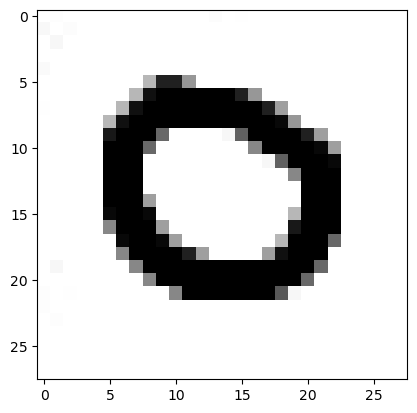

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This digit is probably a 1


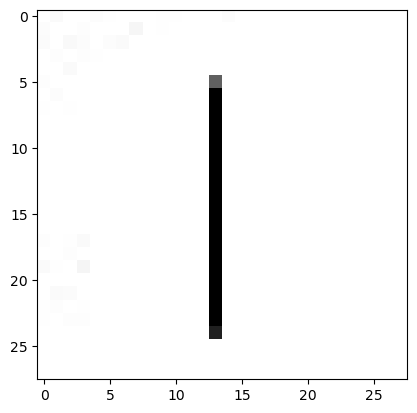

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This digit is probably a 2


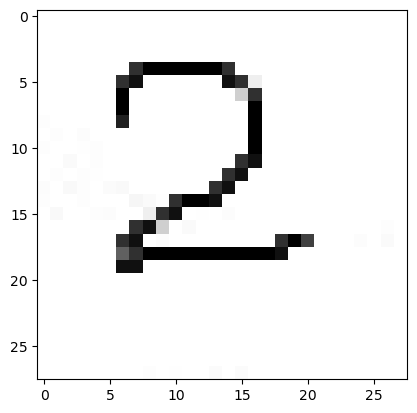

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
This digit is probably a 3


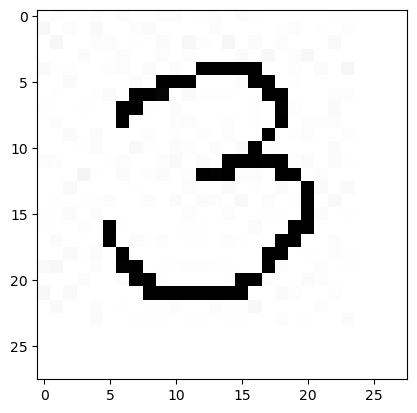

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This digit is probably a 4


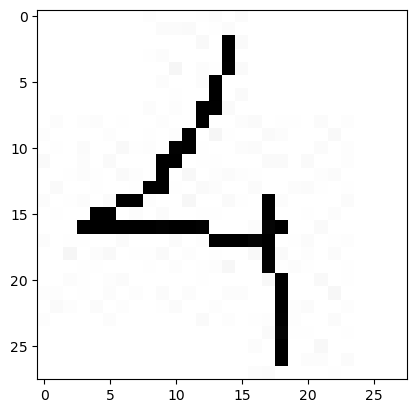

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This digit is probably a 5


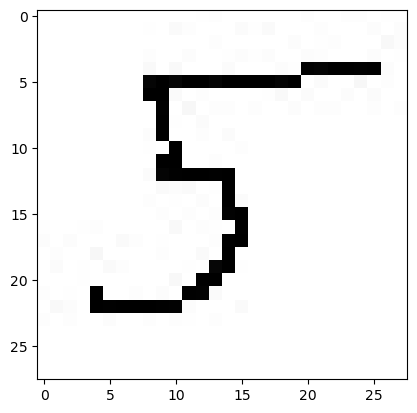

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This digit is probably a 6


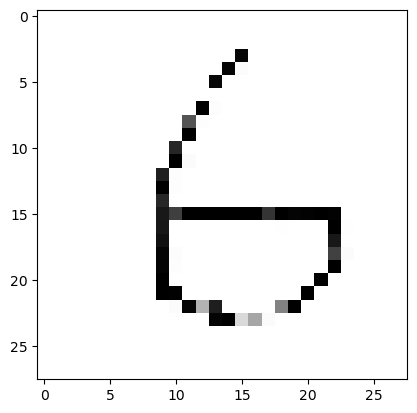

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This digit is probably a 7


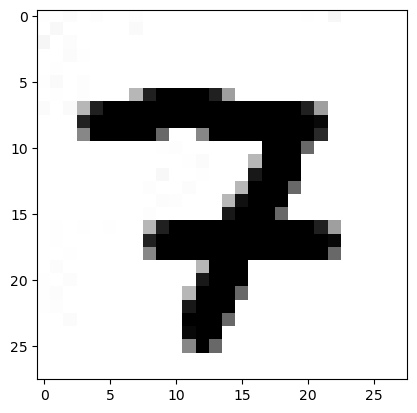

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This digit is probably a 8


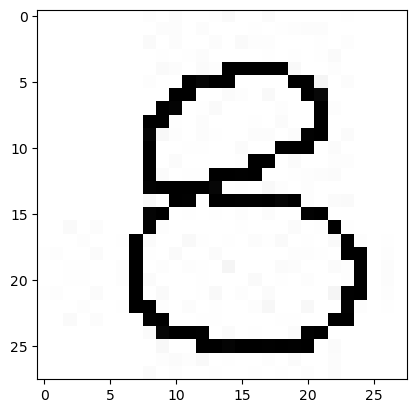

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This digit is probably a 9


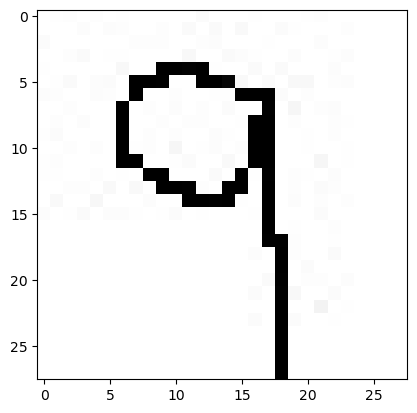

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Current and new directory setup
current_directory = os.getcwd()
new_directory =r"C:\Users\SIRI\OneDrive\Desktop\datasetml"
os.chdir(new_directory)

# Initialize image number
image_number = 0

# Loop through images in the directory
while os.path.isfile(f"{image_number}.png"):
    try:
        # Read the image in grayscale mode
        img = cv2.imread(f"{image_number}.png", cv2.IMREAD_GRAYSCALE)

        # Invert the image colors (optional)
        img = np.invert(img)

        # Normalize the image and reshape if required by your model
        img = np.array([img])

        # Predict using your model (ensure 'model' is defined elsewhere in your code)
        prediction = model.predict(img)

        # Output the prediction
        print(f"This digit is probably a {np.argmax(prediction)}")

        # Display the image using matplotlib
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f"Error processing image {image_number}: {e}")

    finally:
        image_number += 1
